<a href="https://colab.research.google.com/github/sakshamshil/Machine-Learning-Projects/blob/main/Loan%20Status%20Prediction/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Automating loan approval process

**WORK FLOW**

Data -> Data pre processing -> Train Test Split -> Support Vector Machine

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm

###Data Collection and Processing

In [ ]:
loan_dataset = pd.read_csv ('/content/train.csv')

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#no of missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Dropping missing values
loan_dataset = loan_dataset.dropna()
print(loan_dataset.shape)

(480, 13)


In [ ]:
#label encoding (replace y with 1 and n with 0)
loan_dataset.replace({"Loan_Status" : {'N' : 0, 'Y' : 1}}, inplace = True)

<ipython-input-13-b7e170eb1009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status" : {'N' : 0, 'Y' : 1}}, inplace = True)


In [ ]:
loan_dataset['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [ ]:
#Dependent Column Values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
#Replacing all 3+ values to 4, as pushing 3+ in model is not a good practice
loan_dataset = loan_dataset.replace (to_replace = '3+', value = 4)

In [ ]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

###Data visualisation

<Axes: xlabel='Education', ylabel='count'>

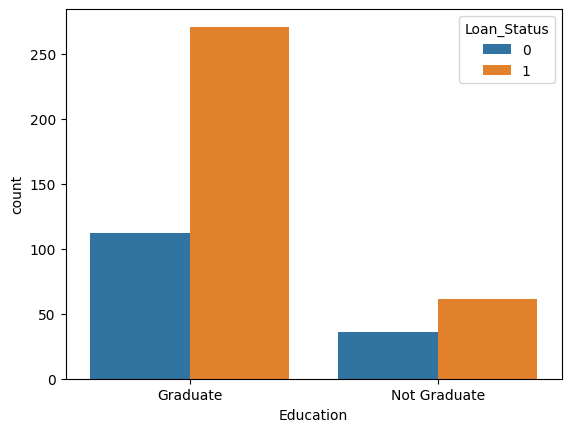

In [ ]:
#education and loan status
sns.countplot (x = 'Education', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

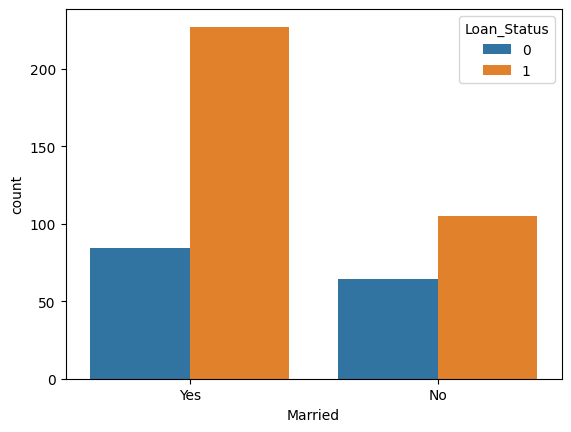

In [ ]:
#married and loan status
sns.countplot (x = 'Married', hue = 'Loan_Status', data = loan_dataset)

In [ ]:
#Convert categorical columns to numerical values (0,1,2)
loan_dataset.replace({"Married" : {'No' : 0, 'Yes' : 1}, "Education" : {'Not Graduate' : 0, "Graduate" : 1}, "Gender" : {"Male" : 1, "Female" : 0},
                      "Property_Area" : {'Rural' : 0, 'Urban' : 1, 'Semiurban' : 2}, "Self_Employed": {'No' : 0, 'Yes' : 1}}, inplace = True)

In [ ]:
 loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


####Seperating Features and Labels

In [ ]:
#Dropping Loan_ID

X = loan_dataset.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [ ]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

####Splitting training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, stratify = Y, random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


##Training the Model : SVM

In [ ]:
classifier = svm.SVC(kernel = 'linear')       #SVC - support vector classifier

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

###Model Evaluation

In [ ]:
#training data
train_predict = classifier.predict(X_train)
train_accuracy = accuracy_score(train_predict, Y_train)
print(train_accuracy)

0.7708333333333334


In [ ]:
#testing data
test_predict = classifier.predict(X_test)
test_accuracy = accuracy_score(test_predict, Y_test)
print(test_accuracy)

0.8125


##Predictive System

In [ ]:
input_data = X_test.iloc[0]
input_data_np = input_data.to_numpy().reshape(1,-1)
prediction = classifier.predict(input_data_np)
print(prediction)
print('Loan Approved' if prediction[0] == 1 else 'Loan Denied')

[1]
Loan Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
